

Huge Thanks to Dr. Emmanuel Dufourq for the notebook file.



## Various Python imports

In [1]:
import numpy as np
np.random.seed(1337) # for reproducibility
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from tensorflow import set_random_seed
import matplotlib.pyplot as plt

## Load the dataset

## View top 5 records

In [3]:
from sklearn.datasets import load_boston


In [4]:
boston = load_boston()
X = boston.data
dataframe = pd.DataFrame( X , columns = boston.feature_names)
dataframe['price'] = boston.target

In [5]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
dataframe.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  price
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]

## View all data

In [7]:
dataframe.shape

(506, 14)

In [ ]:
X

## Split the data into features and the class values

In [8]:
X = boston.data
Y = boston.target

## Check the shapes of the data

In [9]:
X.shape

(506, 13)

In [10]:
Y.shape

(506,)

In [11]:
Y[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

## Split the data into training and test data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

## Create a neural network model

In [15]:
# define the model
def baseline():
    # create model
    model = Sequential()
    # add one fully connected layer
    model.add(Dense(13, input_dim=13, activation='relu'))
    # add a fully connected layer for the output
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=[metrics.mse])
    
    return model

## Add some parameters

In [19]:
estimator = KerasRegressor(build_fn=baseline, epochs=20, batch_size=5, verbose=1)

## Determine the number of trainable parameters

In [17]:
baseline().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


## Fit the model

In [20]:
history = estimator.fit(X_train, Y_train)

Epoch 1/20
71/71 [==============================] - 1s 1ms/step - loss: 35309.4084 - mean_squared_error: 35309.4117
Epoch 2/20
71/71 [==============================] - 0s 1ms/step - loss: 2186.6224 - mean_squared_error: 2186.6224
Epoch 3/20
71/71 [==============================] - 0s 1ms/step - loss: 275.2423 - mean_squared_error: 275.2423
Epoch 4/20
71/71 [==============================] - 0s 1ms/step - loss: 266.1232 - mean_squared_error: 266.1232
Epoch 5/20
71/71 [==============================] - 0s 1ms/step - loss: 185.5484 - mean_squared_error: 185.5484
Epoch 6/20
71/71 [==============================] - 0s 1ms/step - loss: 171.7379 - mean_squared_error: 171.7379
Epoch 7/20
71/71 [==============================] - 0s 1ms/step - loss: 171.9868 - mean_squared_error: 171.9868
Epoch 8/20
71/71 [==============================] - 0s 1ms/step - loss: 134.7241 - mean_squared_error: 134.7241
Epoch 9/20
71/71 [==============================] - 0s 1ms/step - loss: 127.2249 - mean_squared_er

## Predict on the test data

In [21]:
prediction = estimator.predict(X_test)

31/31 [==============================] - 0s 952us/step


## Compute the mean squared error

In [22]:
mean_squared_error(Y_test, prediction)

60.63171857053843

## Plot the error over the epochs

In [23]:
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)
    
    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['mean_squared_error'])
    plt.title('Training Mean Squared Error')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

    return

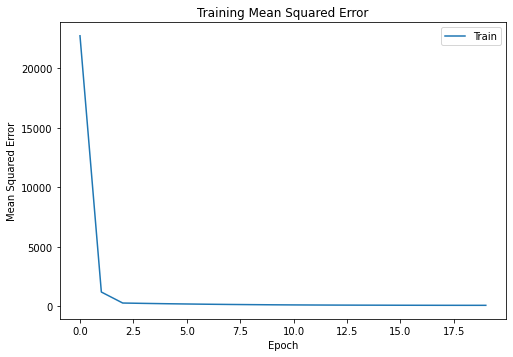

In [24]:
plot_hist(history.history, xsize=8, ysize=12)

# ---------------------------------------------------------
## Task Create a deeper model with more layers

* Here the objective is to create a deeper model to improve the performance compared to the baseline.
* You can add more dense layers.
* You will have to decide on the number of dense layers and the number of units for each one.
* Once you have created your model you can run the remaining cells in this notebook to compare the performance.

In [25]:
def deeper_model():
    # create model

    # YOUR CODE HERE
    
    # Compile model
    
    # YOUR CODE HERE
    return model

## Task: Initialise the model and set some parameters

* Here your objective is to decide on the number of epochs to use
* Replace the "XX" with your value.

In [27]:
estimator = KerasRegressor(build_fn=deeper_model, epochs=XX, batch_size=5, verbose=1)

NameError: ignored

## Check the summary of the model

In [28]:
deeper_model().summary()

NameError: ignored

## Fit the model

In [29]:
loss = estimator.fit(X_train, Y_train)

Epoch 1/20
71/71 [==============================] - 0s 1ms/step - loss: 13516.4285 - mean_squared_error: 13516.4285
Epoch 2/20
71/71 [==============================] - 0s 1ms/step - loss: 1159.7922 - mean_squared_error: 1159.7922
Epoch 3/20
71/71 [==============================] - 0s 1ms/step - loss: 482.8136 - mean_squared_error: 482.8136
Epoch 4/20
71/71 [==============================] - 0s 1ms/step - loss: 191.9359 - mean_squared_error: 191.9359
Epoch 5/20
71/71 [==============================] - 0s 1ms/step - loss: 140.2007 - mean_squared_error: 140.2007
Epoch 6/20
71/71 [==============================] - 0s 1ms/step - loss: 110.6677 - mean_squared_error: 110.6677
Epoch 7/20
71/71 [==============================] - 0s 1ms/step - loss: 82.1647 - mean_squared_error: 82.1647
Epoch 8/20
71/71 [==============================] - 0s 1ms/step - loss: 91.0976 - mean_squared_error: 91.0976
Epoch 9/20
71/71 [==============================] - 0s 1ms/step - loss: 83.7289 - mean_squared_error: 

## Predict on the test data

In [30]:
prediction = estimator.predict(X_test)

31/31 [==============================] - 0s 815us/step


## Evaluate on the test data

In [ ]:
mean_squared_error(Y_test, prediction)